<a href="https://colab.research.google.com/github/nhjung-phd/TimeSeriesAnalysis/blob/main/notebooks/00_STL_Decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Î∂ÑÌï¥Î≤ï(Decomposition Method)

# Ï†ÑÏ≤¥ ÏïÑÏù¥ÎîîÏñ¥

* **Í∞ÄÏ†ï(Î°úÍ∑∏-Í∞ÄÎ≤ï Î™®Ìòï)**

  $$\log y_t ;=; T_t ;+; S_t ;+; R_t$$
  
  ÏõîÎ≥Ñ Î°úÍ∑∏Í∞ÄÍ≤©ÏùÑ **Ï∂îÏÑ∏ (T_t)**, **Í≥ÑÏ†àÏÑ± (S_t)**, **ÏûîÏ∞® (R_t)**Î°ú STLÎ°ú Î∂ÑÌï¥ÌïòÍ≥†,

  * $(T_t)$: Í∞ÑÎã®Ìûà **ÏÑ†ÌòïÌöåÍ∑ÄÎ°ú ÏßÅÏÑ† Ïô∏ÏÇΩ**
  * $(S_t)$: **ÎßàÏßÄÎßâ 1ÎÖÑ(12Í∞úÏõî) Ìå®ÌÑ¥ÏùÑ Î∞òÎ≥µ**(seasonal-naive)
  * $(R_t)$: Î≥¥ÏàòÏ†ÅÏúºÎ°ú **0**(ÌèâÍ∑†)ÏúºÎ°ú Îë†
      
   Ìï©Ï≥êÏÑú $$\hat{\log y}*{t+h}=\hat T*{t+h}+\hat S_{t+h}$$ ‚Üí **ÏßÄÏàòÎ≥ÄÌôò**ÏúºÎ°ú Í∞ÄÍ≤© ÏòàÏ∏°.

Ïôú Î°úÍ∑∏? Ï£ºÍ∞ÄÏ≤òÎüº **Í≥±ÏÖàÏ†Å Í≥ÑÏ†àÏÑ±/Î≥ÄÎèôÏÑ± Î∂àÍ∑†Îì±**ÏùÑ ÏôÑÌôîÌïòÍ≥†, **STL(Í∞ÄÎ≤ï)**Í≥º Ïûò ÎßûÏ∂∞Ï£ºÍ∏∞ ÏúÑÌï¥ÏÑú.


# ÏΩîÎìú ÌùêÎ¶Ñ

## 1) Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

* `yfinance`ÏóêÏÑú **Ï°∞Ï†ïÏ¢ÖÍ∞Ä**Î•º Í∞ÄÏ†∏ÏôÄ **ÏõîÎßê(M)**Î°ú Î¶¨ÏÉòÌîå.
* `y_log = log(price)` (Ïù¥Î¶Ñ Ï∂©Îèå Ïò§Î•ò Î∞©ÏßÄÎ•º ÏúÑÌï¥ `y_log.name`ÏúºÎ°ú Ïù¥Î¶Ñ ÏßÄÏ†ï).

## 2) STL Î∂ÑÌï¥

```python
stl = STL(y_log, period=12, robust=True)
res = stl.fit()
trend, seasonal, resid = res.trend, res.seasonal, res.resid
```

* **period=12**: ÏõîÎç∞Ïù¥ÌÑ∞Ïùò Ïó∞Í∞Ñ Í≥ÑÏ†àÏÑ±.
* **robust=True**: Ïù¥ÏÉÅÏπòÏùò ÏòÅÌñ• ÏôÑÌôî.



[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-267526713.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  px_m = px.resample(freq).last().dropna()


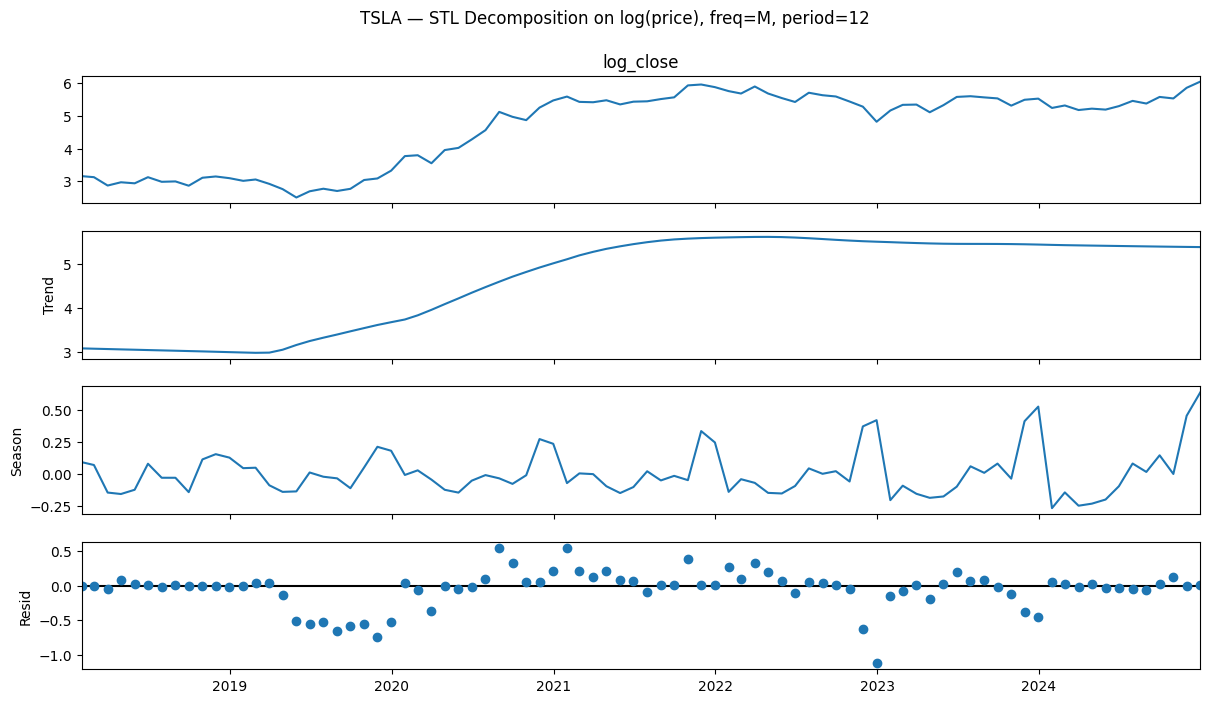

In [1]:
# %pip -q install yfinance statsmodels scikit-learn

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.tsa.seasonal import STL

plt.rcParams["figure.figsize"] = (12, 5)

symbol     = "TSLA"
start_date = "2018-01-01"
end_date   = "2024-12-31"

px = yf.download(symbol, start=start_date, end=end_date, auto_adjust=True)[["Close"]].dropna()
px.index = pd.to_datetime(px.index)

# ÏõîÎßê Î¶¨ÏÉòÌîå
freq   = "M"
period = 12
px_m = px.resample(freq).last().dropna()

# üîß Ïó¨Í∏∞Îßå Î∞îÍø®ÏäµÎãàÎã§
y_log = np.log(px_m["Close"].astype(float))
y_log.name = "log_close"

# STL Î∂ÑÌï¥
stl = STL(y_log, period=period, robust=True)
res = stl.fit()
trend, seasonal, resid = res.trend, res.seasonal, res.resid

fig = res.plot(); fig.set_size_inches(12, 7)
plt.suptitle(f"{symbol} ‚Äî STL Decomposition on log(price), freq={freq}, period={period}", y=1.02)
plt.show()




## 3) ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÎ¶¨(80/20)

* Ïõî Îã®ÏúÑ ÏãúÍ≥ÑÏó¥ÏùÑ ÏãúÍ∞ÑÏàúÏúºÎ°ú Î∂ÑÎ¶¨Ìï¥ÏÑú **Îç∞Ïù¥ÌÑ∞ ÎàÑÏàò Î∞©ÏßÄ**.

## 4) Íµ¨ÏÑ±ÏöîÏÜå ÏòàÏ∏°

* **Ï∂îÏÑ∏ (T)**: `LinearRegression`ÏúºÎ°ú ÏßÅÏÑ† Ï†ÅÌï© ‚Üí ÎØ∏Îûò (h)Í∞úÏõî Ïô∏ÏÇΩ.
* **Í≥ÑÏ†à (S)**: ÎßàÏßÄÎßâ 12Í∞úÏõî Í∞íÏùÑ **Ï∞®Î°ÄÎ°ú Î∞òÎ≥µ**.
  ÏãúÏûë ÏõîÏùÑ ÎßûÏ∂îÍ∏∞ ÏúÑÌï¥ `start_pos = (ÎßàÏßÄÎßâ ÌïôÏäµÏõî + 1) % 12`.
* **ÏûîÏ∞® (R)**: 0ÏúºÎ°ú Îë†(Í∞ÑÎã® Í∏∞Ï§Ä). *Í≥†ÎèÑÌôî Ïãú ARIMA/ETSÎ°ú Î™®Îç∏ÎßÅ Í∞ÄÎä•.*

## 5) Ìï©ÏÑ±¬∑Ïó≠Î≥ÄÌôò¬∑ÌèâÍ∞Ä

* $(\hat{\log y})$ = Ï∂îÏÑ∏ + Í≥ÑÏ†à ‚Üí `np.exp`Î°ú **Í∞ÄÍ≤©**ÏúºÎ°ú Î≥µÏõê.
* ÌÖåÏä§Ìä∏ Íµ¨Í∞ÑÏóêÏÑú **RMSE / MAE / R¬≤** Í≥ÑÏÇ∞.
* Ïã§Ï†ú vs ÏòàÏ∏° **Ïò§Î≤ÑÎ†àÏù¥ ÌîåÎ°Ø** Î∞è **STL Íµ¨ÏÑ±ÏöîÏÜå ÌîåÎ°Ø** Ï∂úÎ†•.



[Decomposition forecast] RMSE=605.8435 | MAE=556.4586 | R2=-98.1023


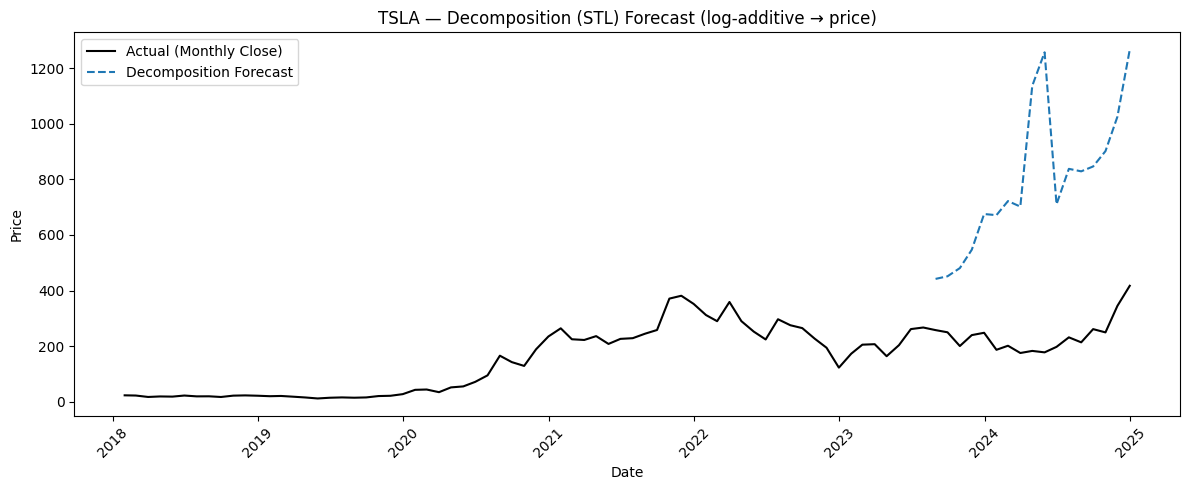

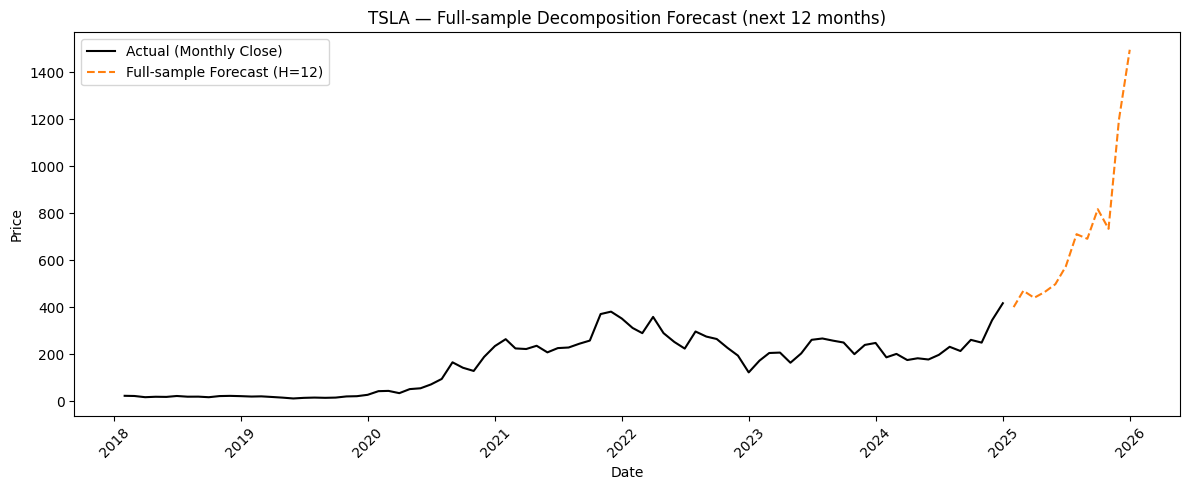

In [6]:
# -----------------------------
# 3) ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÌï† (80/20)
# -----------------------------
n = len(y_log)
split = int(n * 0.8)
y_train, y_test = y_log.iloc[:split], y_log.iloc[split:]
trend_train, seasonal_train = trend.iloc[:split], seasonal.iloc[:split]

dates_train = y_train.index
dates_test  = y_test.index

# -----------------------------
# 4) Í∞ÑÎã®Ìïú ÏòàÏ∏° Ï†ÑÎûµ
# (a) Ï∂îÏÑ∏: ÏÑ†ÌòïÌöåÍ∑ÄÎ°ú Ï∂îÏÑ∏ ÏÑ±Î∂Ñ Ïô∏ÏÇΩ
# (b) Í≥ÑÏ†àÏÑ±: ÌïôÏäµ Íµ¨Í∞ÑÏùò ÎßàÏßÄÎßâ 'period' Ìå®ÌÑ¥ Î∞òÎ≥µ
# ÏûîÏ∞®Îäî ÌèâÍ∑† 0 Í∞ÄÏ†ï
# -----------------------------

def forecast_trend_linear(trend_series, h):
    """Ï∂îÏÑ∏ ÏÑ±Î∂ÑÏùÑ ÏÑ†ÌòïÌöåÍ∑ÄÎ°ú Ïô∏ÏÇΩ."""
    t = np.arange(len(trend_series)).reshape(-1, 1)
    lr = LinearRegression().fit(t, trend_series.values)
    t_future = np.arange(len(trend_series), len(trend_series) + h).reshape(-1, 1)
    return lr.predict(t_future)

def repeat_last_season(seasonal_series, period, h, start_idx=0):
    """
    ÎßàÏßÄÎßâ 'period' Í≥ÑÏ†à Ìå®ÌÑ¥ÏùÑ Í∑∏ÎåÄÎ°ú Î∞òÎ≥µ.
    start_idx=0Ïù¥Î©¥ Î∞îÎ°ú Îã§Ïùå Ïä§ÌÖùÎ∂ÄÌÑ∞ pattern[0]Ïù¥ Î∞∞ÏπòÎê®.
    """
    if len(seasonal_series) < period:
        # Îç∞Ïù¥ÌÑ∞Í∞Ä ÏßßÏúºÎ©¥ ÌèâÍ∑†ÏπòÎ°ú ÎåÄÏ≤¥
        return np.full(h, seasonal_series.mean(), dtype=float)
    last = seasonal_series.values[-period:]
    out = np.empty(h, dtype=float)
    for i in range(h):
        out[i] = last[(start_idx + i) % period]
    return out

# ÌÖåÏä§Ìä∏ Íµ¨Í∞Ñ Í∏∏Ïù¥
h = len(y_test)

# (a) Ï∂îÏÑ∏ ÏòàÏ∏°
trend_fcst = forecast_trend_linear(trend_train, h)

# (b) Í≥ÑÏ†à ÏòàÏ∏° (Îã¨Î†• Ï†ïÎ†¨: ÌÖåÏä§Ìä∏ ÏãúÏûë Îã¨Ïùò "Í≥ÑÏ†à Ìè¨ÏßÄÏÖò" ÎßûÏ∂îÍ∏∞)
# ÌïôÏäµ Íµ¨Í∞ÑÏùò ÎßàÏßÄÎßâ Ïù∏Îç±Ïä§Í∞Ä seasonÏùò Ïñ¥ÎîîÏòÄÎäîÏßÄ Í≥ÑÏÇ∞
# ÏõîÎ≥Ñ(period=12) Í∞ÄÏ†ï: Ïõî Î≤àÌò∏Î•º Ïç®ÏÑú Ï†ïÎ†¨
def month_pos(idx): return idx.month - 1  # 0..11
start_pos = (month_pos(dates_train[-1]) + 1) % period
season_fcst = repeat_last_season(seasonal_train, period, h, start_idx=start_pos)

# (c) Î°úÍ∑∏ ÏòàÏ∏° = Ï∂îÏÑ∏ + Í≥ÑÏ†à (+ ÏûîÏ∞® 0)
log_fcst = trend_fcst + season_fcst

# (d) ÏõêÎã®ÏúÑ(Í∞ÄÍ≤©)Î°ú Î≥µÏõê
price_test = px_m["Close"].iloc[split:]
price_fcst = np.exp(log_fcst)

# -----------------------------
# 5) ÏÑ±Îä• ÌèâÍ∞Ä & ÏãúÍ∞ÅÌôî
# -----------------------------
rmse = np.sqrt(mean_squared_error(price_test.values, price_fcst))
mae  = mean_absolute_error(price_test.values, price_fcst)
r2   = r2_score(price_test.values, price_fcst)
print(f"[Decomposition forecast] RMSE={rmse:.4f} | MAE={mae:.4f} | R2={r2:.4f}")

plt.figure(figsize=(12,5))
plt.plot(px_m.index, px_m["Close"], label="Actual (Monthly Close)", color="black")
plt.plot(dates_test, price_fcst, label="Decomposition Forecast", linestyle="--", color="tab:blue")
plt.title(f"{symbol} ‚Äî Decomposition (STL) Forecast (log-additive ‚Üí price)")
plt.xlabel("Date"); plt.ylabel("Price"); plt.xticks(rotation=45); plt.legend(); plt.tight_layout(); plt.show()

# -----------------------------
# 6) Full-sample ÏµúÏ¢Ö Ï†ÅÌï© ‚Üí ÎØ∏Îûò HÍ∞úÏõî ÏòàÏ∏°
# -----------------------------
H = 12  # Ïòà: 12Í∞úÏõî
stl_full = STL(y_log, period=period, robust=True).fit()
trend_full, seasonal_full = stl_full.trend, stl_full.seasonal

trend_future  = forecast_trend_linear(trend_full, H)

# ÎØ∏Îûò ÏãúÏûë Îã¨(ÌïôÏäµ ÎßàÏßÄÎßâ Îã¨ Îã§ÏùåÎã¨)Ïùò Í≥ÑÏ†à Ìè¨ÏßÄÏÖò
start_pos_full = (month_pos(y_log.index[-1]) + 1) % period
season_future = repeat_last_season(seasonal_full, period, H, start_idx=start_pos_full)

log_future = trend_future + season_future
price_future = np.exp(log_future)

future_idx = pd.date_range(y_log.index[-1] + pd.offsets.MonthEnd(1), periods=H, freq="ME")

plt.figure(figsize=(12,5))
plt.plot(px_m.index, px_m["Close"], label="Actual (Monthly Close)", color="black")
plt.plot(future_idx, price_future, label=f"Full-sample Forecast (H={H})", linestyle="--", color="tab:orange")
plt.title(f"{symbol} ‚Äî Full-sample Decomposition Forecast (next {H} months)")
plt.xlabel("Date"); plt.ylabel("Price"); plt.xticks(rotation=45); plt.legend(); plt.tight_layout(); plt.show()



# ÌïµÏã¨ Ìï®Ïàò(ÏöîÏßÄ)

* `forecast_trend_linear`: Ï∂îÏÑ∏Ïóê **ÏßÅÏÑ†**ÏùÑ Ï†ÅÌï©Ìï¥ ÎØ∏Îûò $(h)$ Ïä§ÌÖù ÏòàÏ∏°.
* `repeat_last_season`: ÎßàÏßÄÎßâ **12Í∞úÏõî Í≥ÑÏ†àÌå®ÌÑ¥**ÏùÑ Í∑∏ÎåÄÎ°ú Î∞òÎ≥µ.
* (ÏÑ†ÌÉù) ÏûîÏ∞®Î•º Îî∞Î°ú Î™®Îç∏ÎßÅÌïòÎ©¥ Ï†ïÎ∞ÄÎèÑÍ∞Ä Îçî Ï¢ãÏïÑÏßà Ïàò ÏûàÏñ¥Ïöî.



# ÏûêÏ£º Î¨ªÎäî ÏßàÎ¨∏(FAQ)

**Q1. Í≥ÑÏ†àÏÑ±Ïù¥ ÏïΩÌïú Ï£ºÍ∞ÄÏóêÎèÑ Ïú†Ìö®ÌïúÍ∞ÄÏöî?**

* Í∞ïÌïú ‚ÄòÏ∫òÎ¶∞Îçî‚Äô Ìå®ÌÑ¥Ïù¥ ÏóÜÏùÑ Ïàò ÏûàÏñ¥ ÏÑ±Îä•Ïù¥ Ï†úÌïúÎê† Ïàò ÏûàÏäµÎãàÎã§. Í∑∏Îü¥ Îïê **STLÏùò trendÎßå Ïì∞Í≥† seasonalÏùÄ 0**ÏúºÎ°ú ÎëêÍ±∞ÎÇò, **ÏûîÏ∞®Ïóê ARIMA/SARIMA**Î•º ÏñπÏñ¥ Î≥¥ÏÑ∏Ïöî.

**Q2. ÏùºÎ¥âÏúºÎ°ú ÌïòÍ≥† Ïã∂Îã§Î©¥?**

* `period=5`(Ï£ºÏ§ë Í±∞ÎûòÏùº), ÎòêÎäî `B`(ÏòÅÏóÖÏùº) Í∏∞Ï§Ä. Îã§Îßå Ìú¥Ïû•/Ïù¥Î≤§Ìä∏Î°ú Ï£ºÍ∏∞ÏÑ±Ïù¥ ÌùîÎì§Î¶¥ Ïàò ÏûàÏñ¥ Ïõî/Ï£º Î¶¨ÏÉòÌîåÏù¥ ÏïàÏ†ïÏ†ÅÏûÖÎãàÎã§.

**Q3. Ïôú Î°úÍ∑∏Ïù∏Í∞ÄÏöî?**

* **Î≥ÄÎèôÏÑ± ÏïàÏ†ïÌôî**ÏôÄ **Í≥±ÏÖàÏ†Å Í≥ÑÏ†àÏÑ± ‚Üí Í∞ÄÎ≤ïÌôî** Ìö®Í≥º. ÏòàÏ∏° ÌõÑ `exp`Î°ú ÎêòÎèåÎ¶ΩÎãàÎã§.

**Q4. Îã®Ïàú Î∞òÎ≥µ ÎåÄÏã† Îçî ÎòëÎòëÌïú Í≥ÑÏ†à ÏòàÏ∏°ÏùÄ?**

* ÏµúÍ∑º Î™á ÎÖÑÏùò Í∞ôÏùÄ Îã¨ ÌèâÍ∑†, Holt-Winters(ETS)Ïùò Í≥ÑÏ†à ÏÑ±Î∂Ñ, ÎòêÎäî TBATS/Prophet Í∞ôÏùÄ Î∞©Î≤ïÏúºÎ°ú ÎåÄÏ≤¥ Í∞ÄÎä•Ìï©ÎãàÎã§.



# ÌôïÏû• ÏïÑÏù¥ÎîîÏñ¥

* **Fixed-origin / Rolling / Expanding** Î∞±ÌÖåÏä§Ìä∏Î°ú ÌèâÍ∞Ä(ÏõêÏ†ê Ïù¥Îèô).
* ÏûîÏ∞® $(R_t)$Î•º ARIMA/SARIMAÎ°ú ÏòàÏ∏°Ìï¥ $(\hat{T}+\hat{S}+\hat{R})$ Íµ¨ÏÑ±.
* **ÎπÑÏÑ†Ìòï Ï∂îÏÑ∏**$(spline/LOESS)$ Ïô∏ÏÇΩ, **Regressor**(Í±∞ÎûòÎüâ, Í∏àÎ¶¨ Îì±) Ï∂îÍ∞Ä.